In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('text', usetex=True)
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 16})
import numpy as np
import os
import pandas as pd
from pprint import pprint
from scipy.interpolate import make_interp_spline
from scipy.ndimage.filters import gaussian_filter1d
import seaborn as sb
sb.color_palette("tab10")
import sys
import tensorflow as tf
import tensorflow.keras as keras
import time
from typing import List, OrderedDict, Tuple

os.chdir('PUT THE REPO DIRECTORY HERE!')

## Learning rate tuning

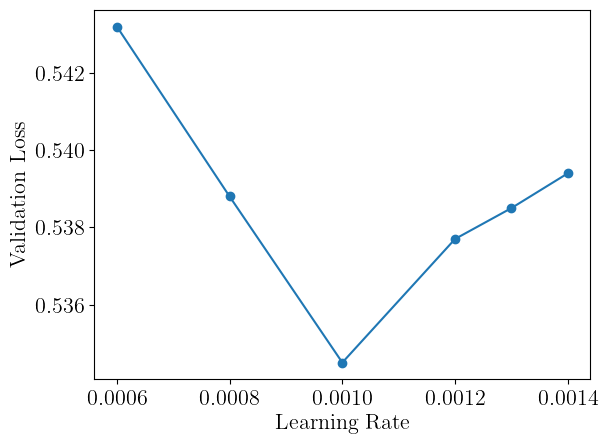

In [56]:
exp_search = [77.39, 5.95, .7916, .5365, .5917]
rand_search = {
    'x': [
        0.0006,
        0.0008,
        0.0010,
        0.0012,
        0.0013,
        0.0014
    ],
    'y': [
        0.5432,
        0.5388,
        0.5345,
        0.5377,
        0.5385,
        0.5394
    ]
}
# plt.box(False)
plt.plot(rand_search['x'], rand_search['y'],'-o')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Loss')
plt.savefig('lratetuning.eps', format='eps', bbox_inches='tight')

## Optimizer Selection

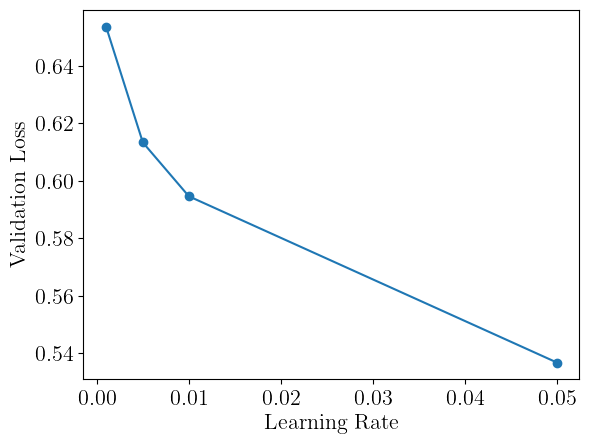

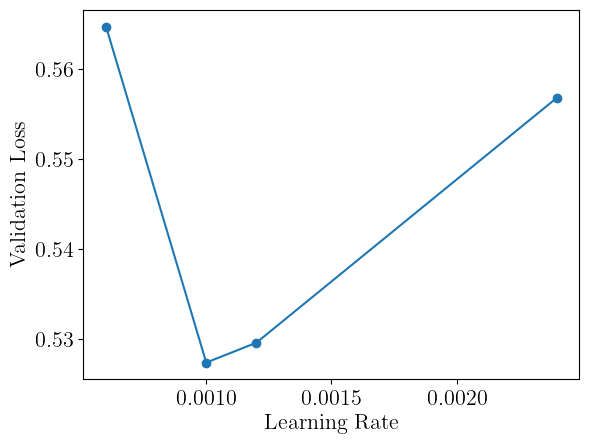

In [65]:
df = pd.DataFrame.from_dict({
    'lrate': [0.001,0.005,0.01,0.05, 0.0006,0.001,0.0012,0.0024,],
    'loss': [0.6536, 0.6133, 0.5946, 0.5368,0.5647, 0.5274, 0.5296, 0.5568],
    'opt': ['adagrad','adagrad','adagrad','adagrad','adam','adam','adam','adam']
})
data=df[df['opt'] == 'adagrad']
plt.box(True)
plt.plot(data['lrate'], data['loss'],'-o')

plt.xlabel('Learning Rate')
plt.ylabel('Validation Loss')
plt.savefig('adagrad.eps', format='eps', bbox_inches='tight')
plt.show()
data=df[df['opt'] == 'adam']
plt.plot(data['lrate'], data['loss'],'-o')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Loss')
plt.savefig('adam.eps', format='eps', bbox_inches='tight')

## Initial baseline

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


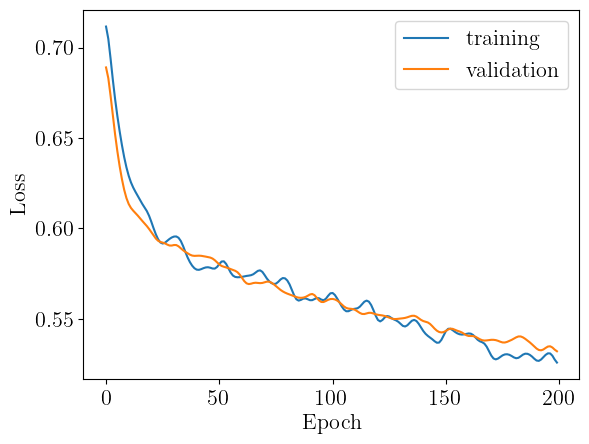

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


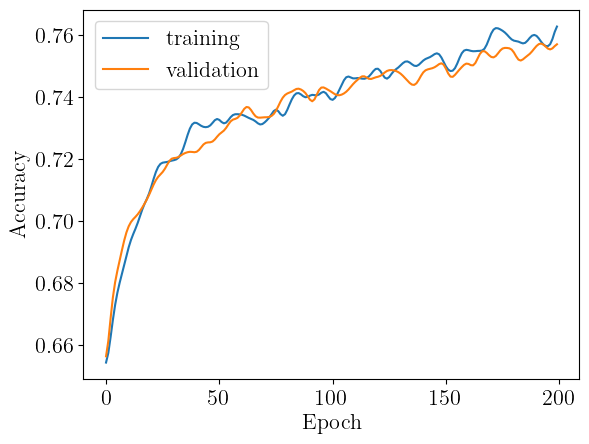

In [167]:
basetrain = pd.read_csv(
    './results/v1_0_0/rmsprop_adagrad_adam_comparison/run-20211107-024951-train-v1.0.0-lrate0001-adam-batch64-epochs200-stepsperepoch100_session1_train-tag-epoch_loss.csv'
)
baseval = pd.read_csv(
    './results/v1_0_0/rmsprop_adagrad_adam_comparison/run-20211107-024951-train-v1.0.0-lrate0001-adam-batch64-epochs200-stepsperepoch100_session1_validation-tag-epoch_loss.csv'
)
basetrain['Value'] = gaussian_filter1d(basetrain['Value'], sigma=2)
baseval['Value'] = gaussian_filter1d(baseval['Value'], sigma=2)
plt.plot(basetrain['Step'],basetrain['Value'],label='training')
plt.plot(baseval['Step'],baseval['Value'],label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('baseline.eps', format='eps', bbox_inches='tight')
plt.show()
##
##
basetrain_acc = pd.read_csv(
    './results/v1_0_0/rmsprop_adagrad_adam_comparison/run-20211107-024951-train-v1.0.0-lrate0001-adam-batch64-epochs200-stepsperepoch100_session1_train-tag-epoch_acc.csv'
)
baseval_acc = pd.read_csv(
    './results/v1_0_0/rmsprop_adagrad_adam_comparison/run-20211107-024951-train-v1.0.0-lrate0001-adam-batch64-epochs200-stepsperepoch100_session1_validation-tag-epoch_acc.csv'
)
basetrain_acc['Value'] = gaussian_filter1d(basetrain_acc['Value'], sigma=2)
baseval_acc['Value'] = gaussian_filter1d(baseval_acc['Value'], sigma=2)
plt.plot(basetrain_acc['Step'],basetrain_acc['Value'],label='training')
plt.plot(baseval_acc['Step'],baseval_acc['Value'],label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('baseline_acc.eps', format='eps', bbox_inches='tight')

## 1 Hidden layer

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


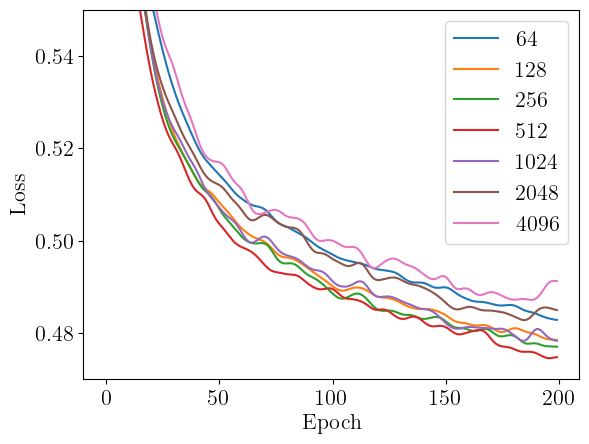

In [106]:
df64 = pd.read_csv(
    './results/v1_0_0/singlehiddenlayer_optimization/run-20211108-133746-train-v1.0.0-hidden64-lrate0001-adam-batch256-epochs200-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)
df128 = pd.read_csv(
    './results/v1_0_0/singlehiddenlayer_optimization/run-20211108-113213-train-v1.0.0-hidden128-lrate0001-adam-batch256-epochs200-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)
df256 = pd.read_csv(
    './results/v1_0_0/singlehiddenlayer_optimization/run-20211108-100648-train-v1.0.0-hidden256-lrate0001-adam-batch256-epochs200-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)
df512 = pd.read_csv(
    './results/v1_0_0/singlehiddenlayer_optimization/run-20211107-120414-train-v1.0.0-hidden512-lrate0001-adam-batch256-epochs400-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)
df1024 = pd.read_csv(
    './results/v1_0_0/singlehiddenlayer_optimization/run-20211107-214837-train-v1.0.0-hidden1024-lrate0001-adam-batch256-epochs400-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)
df2048 = pd.read_csv(
    './results/v1_0_0/singlehiddenlayer_optimization/run-20211108-034440-train-v1.0.0-hidden2048-lrate0001-adam-batch256-epochs200-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)
df4096 = pd.read_csv(
    './results/v1_0_0/singlehiddenlayer_optimization/run-20211108-082454-train-v1.0.0-hidden4096-lrate0001-adam-batch256-epochs200-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)
dfs = [df64, df128, df256, df512, df1024, df2048, df4096]
ax = plt.gca()
ax.set_ylim([0.47, 0.55])
for df,size in zip(dfs,[64,128,256,512,1024,2048,4096]):
    x = df['Step'][:200]
    y = df['Value'][:200]
    y = gaussian_filter1d(y, sigma=3)
    plt.plot(x, y, label=str(size))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.show()
plt.savefig('singlelayer.eps', format='eps', bbox_inches='tight')


## $N$ Hidden layers

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


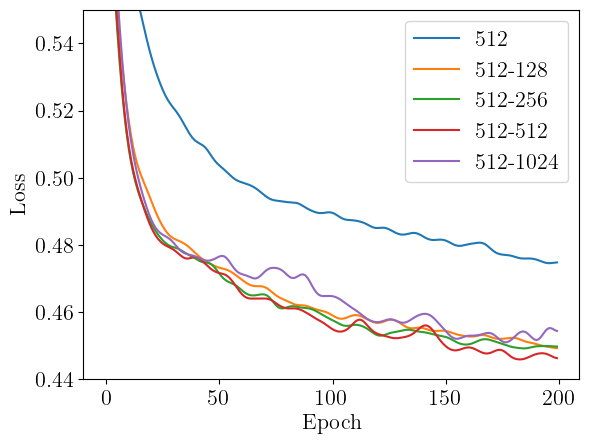

In [127]:
df2_128 = pd.read_csv(
    './results/v1_0_0/hiddenarch_optimization/run-20211108-190430-train-v1.0.0-hidden_512_128-lrate0001-adam-batch256-epochs200-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)
df2_256 = pd.read_csv(
    './results/v1_0_0/hiddenarch_optimization/run-20211108-174857-train-v1.0.0-hidden_512_256-lrate0001-adam-batch256-epochs200-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)
df2_512 = pd.read_csv(
    './results/v1_0_0/hiddenarch_optimization/run-20211108-162947-train-v1.0.0-hidden_512_512-lrate0001-adam-batch256-epochs200-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)
df2_1024 = pd.read_csv(
    './results/v1_0_0/hiddenarch_optimization/run-20211108-150216-train-v1.0.0-hidden_512_1024-lrate0001-adam-batch256-epochs200-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)

plt.plot(df512['Step'][:200], gaussian_filter1d(df512['Value'][:200], sigma=3), label='512')
dfs = [df2_128, df2_256, df2_512, df2_1024]
ax = plt.gca()
ax.set_ylim([0.44, 0.55])
for df,size in zip(dfs,[128,256,512,1024]):
    x = df['Step'][:200]
    y = df['Value'][:200]
    y = gaussian_filter1d(y, sigma=3)
    plt.plot(x, y, label=f'512-{size}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.show()
plt.savefig('layer2.eps', format='eps', bbox_inches='tight')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


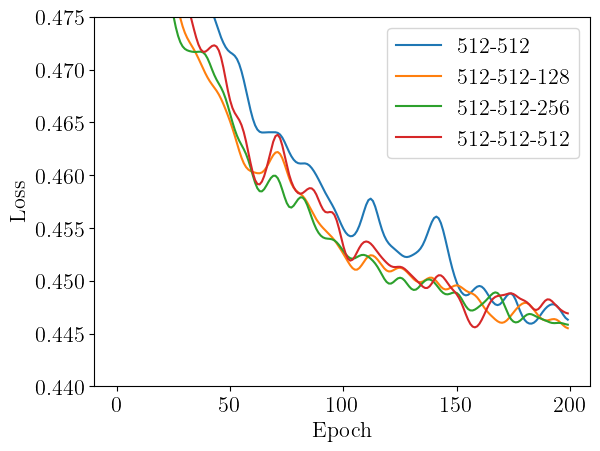

In [146]:
df3a_128 = pd.read_csv(
    './results/v1_0_0/hiddenarch_optimization/run-20211109-003819-train-v1.0.0-hidden_512_512_128-lrate0001-adam-batch256-epochs200-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)
df3a_256 = pd.read_csv(
    './results/v1_0_0/hiddenarch_optimization/run-20211108-231757-train-v1.0.0-hidden_512_512_256-lrate0001-adam-batch256-epochs200-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)
df3a_512 = pd.read_csv(
    './results/v1_0_0/hiddenarch_optimization/run-20211108-215532-train-v1.0.0-hidden_512_512_512-lrate0001-adam-batch256-epochs200-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)
# plt.plot(df512['Step'][:200], gaussian_filter1d(df512['Value'][:200], sigma=3), label='512')
# plt.plot(df2_256['Step'][:200], gaussian_filter1d(df2_256['Value'][:200], sigma=3), label='512-256')
plt.plot(df2_512['Step'][:200], gaussian_filter1d(df2_512['Value'][:200], sigma=3), label='512-512')
dfs = [df3a_128, df3a_256, df3a_512]
ax = plt.gca()
ax.set_ylim([0.44, 0.475])
for df,size in zip(dfs,[128,256,512]):
    x = df['Step'][:200]
    y = df['Value'][:200]
    y = gaussian_filter1d(y, sigma=3)
    plt.plot(x, y, label=f'512-512-{size}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.show()
plt.savefig('layer3a.eps', format='eps', bbox_inches='tight')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


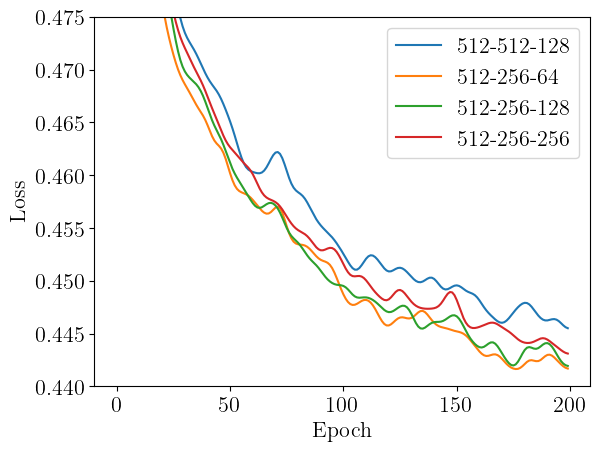

In [153]:
df3b_64 = pd.read_csv(
    './results/v1_0_0/hiddenarch_optimization/run-20211109-080636-train-v1.0.0-hidden_512_256_256-lrate0001-adam-batch256-epochs200-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)
df3b_128 = pd.read_csv(
    './results/v1_0_0/hiddenarch_optimization/run-20211109-092350-train-v1.0.0-hidden_512_256_128-lrate0001-adam-batch256-epochs200-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)
df3b_256 = pd.read_csv(
    './results/v1_0_0/hiddenarch_optimization/run-20211109-110812-train-v1.0.0-hidden_512_256_64-lrate0001-adam-batch256-epochs200-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)
# plt.plot(df512['Step'][:200], gaussian_filter1d(df512['Value'][:200], sigma=3), label='512')
# plt.plot(df2_512['Step'][:200], gaussian_filter1d(df2_512['Value'][:200], sigma=3), label='512-512')
plt.plot(df3a_128['Step'][:200], gaussian_filter1d(df3a_128['Value'][:200], sigma=3), label='512-512-128')
dfs = [df3b_64, df3b_128, df3b_256]
ax = plt.gca()
ax.set_ylim([0.44, 0.475])
for df,size in zip(dfs,[64,128,256]):
    x = df['Step'][:200]
    y = df['Value'][:200]
    y = gaussian_filter1d(y, sigma=3)
    plt.plot(x, y, label=f'512-256-{size}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.show()
plt.savefig('layer3b.eps', format='eps', bbox_inches='tight')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


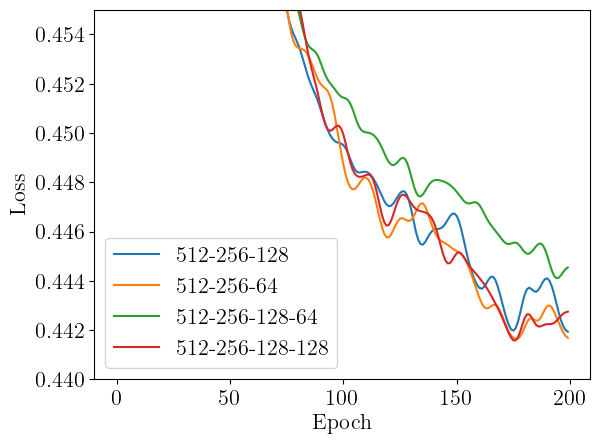

In [155]:
df4_64 = pd.read_csv(
    './results/v1_0_0/hiddenarch_optimization/run-20211109-134900-train-v1.0.0-hidden_512_256_128_64-lrate0001-adam-batch256-epochs200-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)
df4_128 = pd.read_csv(
    './results/v1_0_0/hiddenarch_optimization/run-20211109-122926-train-v1.0.0-hidden_512_256_128_128-lrate0001-adam-batch256-epochs200-stepsperepoch300_session1_validation-tag-epoch_loss.csv'
)
# plt.plot(df512['Step'][:200], gaussian_filter1d(df512['Value'][:200], sigma=3), label='512')
# plt.plot(df2_256['Step'][:200], gaussian_filter1d(df2_256['Value'][:200], sigma=3), label='512-256')
# plt.plot(df2_512['Step'][:200], gaussian_filter1d(df2_512['Value'][:200], sigma=3), label='512-512')
plt.plot(df3b_128['Step'][:200], gaussian_filter1d(df3b_128['Value'][:200], sigma=3), label='512-256-128')
plt.plot(df3b_64['Step'][:200], gaussian_filter1d(df3b_64['Value'][:200], sigma=3), label='512-256-64')
dfs = [df4_64, df4_128]
ax = plt.gca()
ax.set_ylim([0.44, 0.455])
for df,size in zip(dfs,[64,128]):
    x = df['Step'][:200]
    y = df['Value'][:200]
    y = gaussian_filter1d(y, sigma=3)
    plt.plot(x, y, label=f'512-256-128-{size}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.show()
plt.savefig('layer4.eps', format='eps', bbox_inches='tight')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


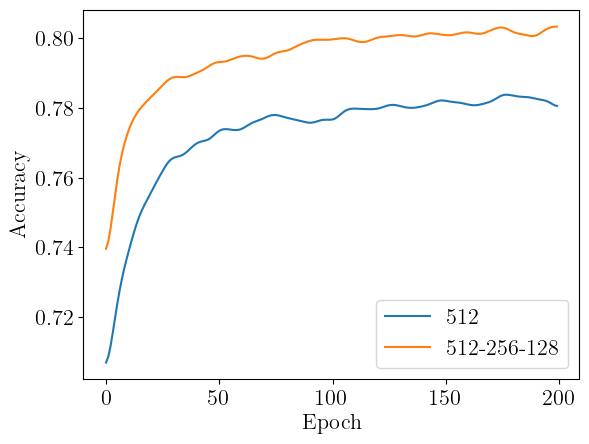

In [159]:
df512acc = pd.read_csv(
    './results/v1_0_0/singlehiddenlayer_optimization/run-20211107-120414-train-v1.0.0-lrate0001-adam-batch256-epochs400-stepsperepoch300_session2_validation-tag-epoch_acc_BESTSINGLELAYER.csv'
)
df3bacc_128 = pd.read_csv(
    './results/v1_0_0/hiddenarch_optimization/run-20211109-092350-train-v1.0.0-hidden_512_256_128-lrate0001-adam-batch256-epochs200-stepsperepoch300_session1_validation-tag-epoch_acc.csv'
)
plt.plot(df512acc['Step'][:200], gaussian_filter1d(df512acc['Value'][:200], sigma=3), label='512')
plt.plot(df3bacc_128['Step'][:200], gaussian_filter1d(df3bacc_128['Value'][:200], sigma=3), label='512-256-128')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# plt.show()
plt.savefig('hiddenopt_resultcomp.eps', format='eps', bbox_inches='tight')


## Full model

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


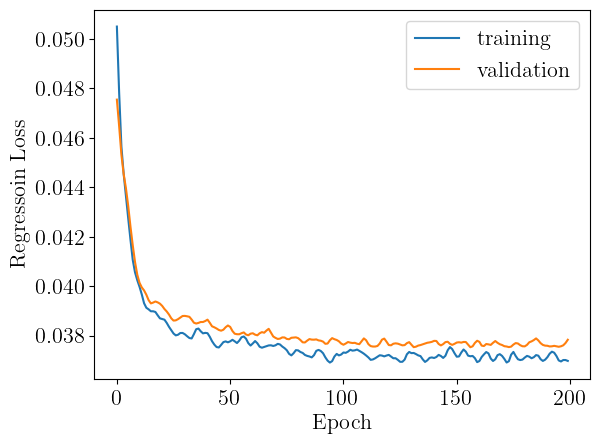

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


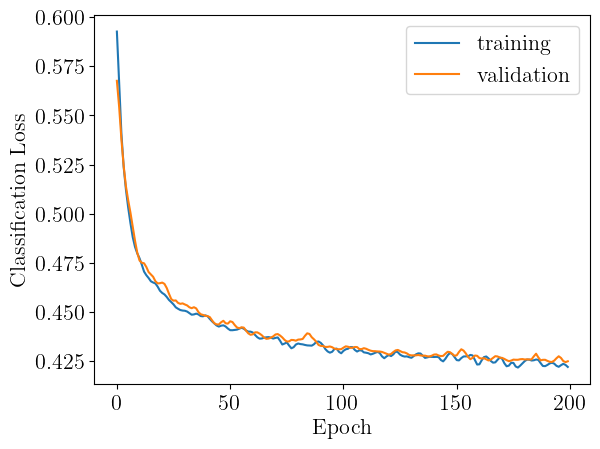

In [177]:
dflossreg = pd.read_csv(
    './results/v1_0_1/hidden_activation/run-20211111-184030-train-v1.0.0-ablationnone-hidden_512_256_128-lrate0001-adam-batch256-epochs200-stepsperepoch300-valsteps200_session1_train-tag-regloss.csv'
)
dflossreg_val = pd.read_csv(
    './results/v1_0_1/hidden_activation/run-20211111-184030-train-v1.0.0-ablationnone-hidden_512_256_128-lrate0001-adam-batch256-epochs200-stepsperepoch300-valsteps200_session1_validation-regloss.csv'
)
dflossclass = pd.read_csv(
    './results/v1_0_1/hidden_activation/run-20211111-184030-train-v1.0.0-ablationnone-hidden_512_256_128-lrate0001-adam-batch256-epochs200-stepsperepoch300-valsteps200_session1_train-tag-classloss.csv'
)
dflossclass_val = pd.read_csv(
    './results/v1_0_1/hidden_activation/run-20211111-184030-train-v1.0.0-ablationnone-hidden_512_256_128-lrate0001-adam-batch256-epochs200-stepsperepoch300-valsteps200_session1_validation-classloss.csv'
)
plt.plot(dflossreg['Step'][:200], gaussian_filter1d(dflossreg['Value'][:200], sigma=1), label='training')
plt.plot(dflossreg_val['Step'][:200], gaussian_filter1d(dflossreg_val['Value'][:200], sigma=1), label='validation')
plt.xlabel('Epoch')
plt.ylabel('Regressoin Loss')
plt.legend()
plt.savefig('full_regloss.eps', format='eps', bbox_inches='tight')
plt.show()
##
##
plt.plot(dflossclass['Step'][:200], gaussian_filter1d(dflossclass['Value'][:200], sigma=1), label='training')
plt.plot(dflossclass_val['Step'][:200], gaussian_filter1d(dflossclass_val['Value'][:200], sigma=1), label='validation')
plt.xlabel('Epoch')
plt.ylabel('Classification Loss')
plt.legend()
plt.savefig('full_classloss.eps', format='eps', bbox_inches='tight')

## Batch size tuning

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


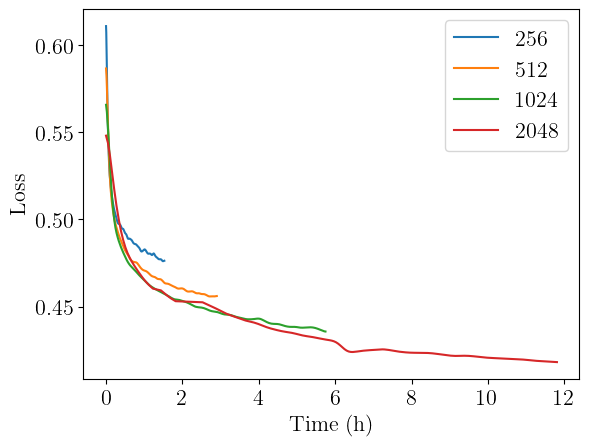

In [195]:
dfbatch_256 = pd.read_csv(
    './results/v1_0_1/batch_size/run-20211110-102222-train-v1.0.0-hidden_512_256_128-lrate0001-adam-batch256-epochs600-stepsperepoch300-valsteps200_session1_validation-tag-epoch_loss.csv'
)
dfbatch_512 = pd.read_csv(
    './results/v1_0_1/batch_size/run-20211110-150526-train-v1.0.0-hidden_512_256_128-lrate0001-adam-batch512-epochs600-stepsperepoch300-valsteps200_session1_validation-tag-epoch_loss.csv'
)
dfbatch_1024 = pd.read_csv(
    './results/v1_0_1/batch_size/run-20211110-180531-train-v1.0.0-hidden_512_256_128-lrate0001-adam-batch1024-epochs200-stepsperepoch300-valsteps200_session1_validation-tag-epoch_loss.csv'
)
dfbatch_2048 = pd.read_csv(
    './results/v1_0_1/batch_size/run-20211111-000136-train-v1.0.0-hidden_512_256_128-lrate0001-adam-batch2048-epochs200-stepsperepoch300-valsteps200_session1_validation-tag-epoch_loss.csv'
)
dfs = [dfbatch_256, dfbatch_512, dfbatch_1024, dfbatch_2048]
ax = plt.gca()
# ax.set_ylim([0.44, 0.475])
for df,size in zip(dfs,[256,512,1024,2048]):
    x = (df['Wall time'][:195] - df['Wall time'][0])/3600
    y = df['Value'][:195] 
    y = gaussian_filter1d(y, sigma=3)
    plt.plot(x, y, label=f'{size}')
plt.xlabel('Time (h)')
plt.ylabel('Loss')
plt.legend()
plt.savefig('batchsize_tuning.eps', format='eps', bbox_inches='tight')
plt.show()


## Ablation Studies

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


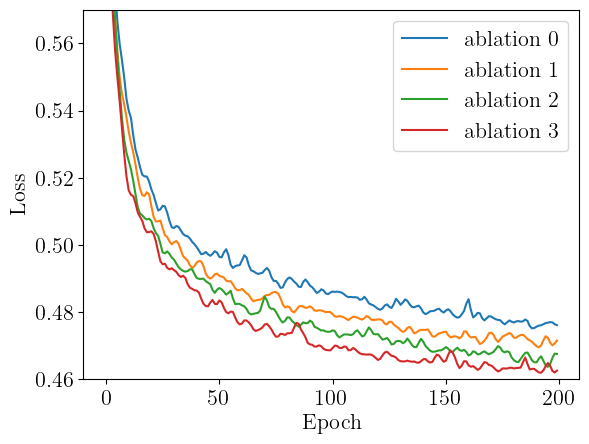

In [203]:
dfabla_all = pd.read_csv(
    './results/v1_0_1/ablation_studies/run-20211110-102222-train-v1.0.0-hidden_512_256_128-lrate0001-adam-batch256-epochs600-stepsperepoch300-valsteps200_session1_validation-tag-epoch_loss.csv'
)
dfabla_1 = pd.read_csv(
    './results/v1_0_1/ablation_studies/run-20211111-154039-train-v1.0.0-ablation1_hidden_512_256_128-lrate0001-adam-batch256-epochs200-stepsperepoch300-valsteps200_session1_validation-tag-epoch_loss.csv'
)
dfabla_2 = pd.read_csv(
    './results/v1_0_1/ablation_studies/run-20211111-173202-train-v1.0.0-ablation2_hidden_512_256_128-lrate0001-adam-batch256-epochs200-stepsperepoch300-valsteps200_session1_validation-tag-epoch_loss.csv'
)
dfabla_none = pd.read_csv(
    './results/v1_0_1/ablation_studies/run-20211111-184030-train-v1.0.0-ablationnone_hidden_512_256_128-lrate0001-adam-batch256-epochs200-stepsperepoch300-valsteps200_session1_validation-tag-epoch_loss.csv'
)
dfs = [dfabla_all, dfabla_1, dfabla_2, dfabla_none]
ax = plt.gca()
ax.set_ylim([0.46, 0.57])
for group, df in enumerate(dfs):
    x = df['Step'][:200]
    y = df['Value'][:200] 
    y = gaussian_filter1d(y, sigma=1)
    plt.plot(x, y, label=f'ablation {group}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('ablations.eps', format='eps', bbox_inches='tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


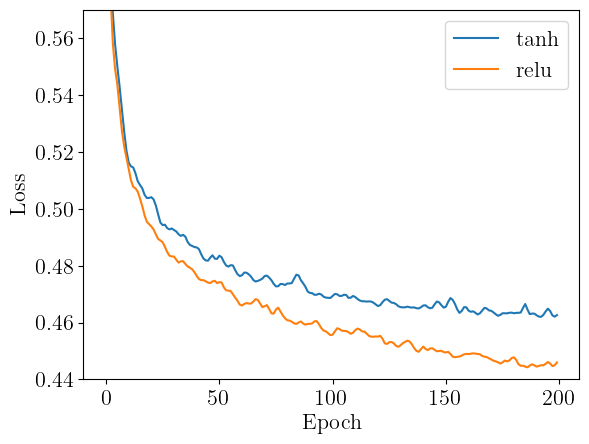

In [208]:
dfanth = pd.read_csv(
    './results/v1_0_1/hidden_activation/run-20211111-184030-train-v1.0.0-ablationnone-hidden_512_256_128-lrate0001-adam-batch256-epochs200-stepsperepoch300-valsteps200_session1_validation.csv'
)
dfrelu = pd.read_csv(
    './results/v1_0_1/hidden_activation/run-20211112-012914-train-v1.0.0-ablationnone-hidden_512_256_128-hiddenact_relu-lrate0001-adam-batch256-epochs200-stepsperepoch300-valsteps200_session1_validation.csv'
)
dfs = [dfanth, dfrelu]
ax = plt.gca()
ax.set_ylim([0.44, 0.57])
for act, df in zip(['tanh', 'relu'], dfs):
    x = df['Step'][:200]
    y = df['Value'][:200] 
    y = gaussian_filter1d(y, sigma=1)
    plt.plot(x, y, label=f'{act}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('hiddenact.eps', format='eps', bbox_inches='tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


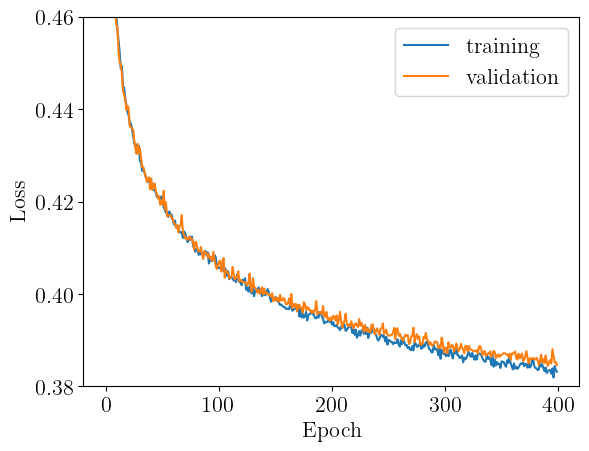

In [239]:
best = pd.read_csv(
    './results/v1_0_1/bestfit/run-20211112-112248-train-v1.0.0-bestfit_session1_train-tag-epoch_loss.csv'
)
bestval = pd.read_csv(
    './results/v1_0_1/bestfit/run-20211112-112248-train-v1.0.0-bestfit_session1_validation-tag-epoch_loss.csv'
)
bestclass = pd.read_csv(
    './results/v1_0_1/bestfit/run-20211112-112248-train-v1.0.0-bestfit_session1_train-tag-epoch_class_loss.csv'
)
bestclassval = pd.read_csv(
    './results/v1_0_1/bestfit/run-20211112-112248-train-v1.0.0-bestfit_session1_validation-tag-epoch_class_loss.csv'
)
bestclassacc = pd.read_csv(
    './results/v1_0_1/bestfit/run-20211112-112248-train-v1.0.0-bestfit_session1_train-tag-epoch_class_acc.csv'
)
bestclassaccval = pd.read_csv(
    './results/v1_0_1/bestfit/run-20211112-112248-train-v1.0.0-bestfit_session1_validation-tag-epoch_class_acc.csv'
)
bestreg = pd.read_csv(
    './results/v1_0_1/bestfit/run-20211112-112248-train-v1.0.0-bestfit_session1_train-tag-epoch_reg_loss.csv'
)
bestregval = pd.read_csv(
    './results/v1_0_1/bestfit/run-20211112-112248-train-v1.0.0-bestfit_session1_validation-tag-epoch_reg_loss.csv'
)
bestregmae = pd.read_csv(
    './results/v1_0_1/bestfit/run-20211112-112248-train-v1.0.0-bestfit_session1_train-tag-epoch_reg_mae.csv'
)
bestregmaeval = pd.read_csv(
    './results/v1_0_1/bestfit/run-20211112-112248-train-v1.0.0-bestfit_session1_validation-tag-epoch_reg_mae.csv'
)
##
##
x = best['Step']
##
##
ax = plt.gca()
ax.set_ylim([0.38, 0.46])
plt.plot(x, best['Value'], label='training')
plt.plot(x, bestval['Value'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('best.eps', format='eps', bbox_inches='tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


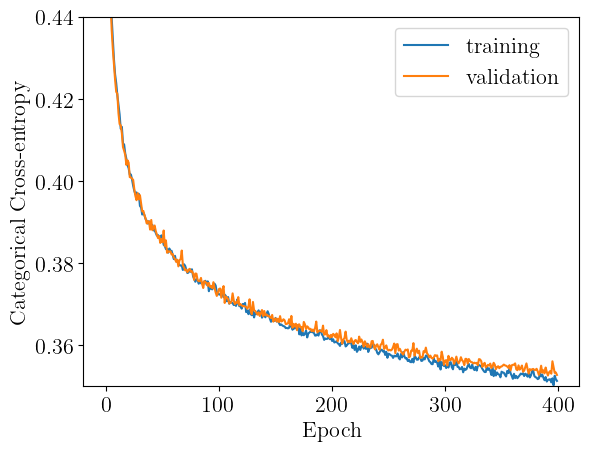

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


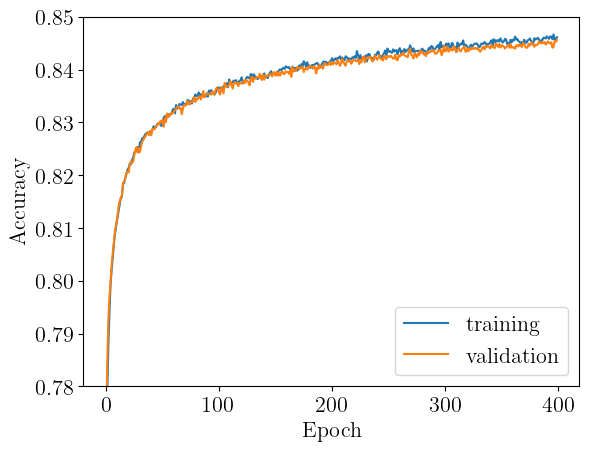

In [238]:
ax = plt.gca()
ax.set_ylim([0.35, 0.44])
plt.plot(x, bestclass['Value'], label='training')
plt.plot(x, bestclassval['Value'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Categorical Cross-entropy')
plt.legend()
plt.savefig('bestclass.eps', format='eps', bbox_inches='tight')
plt.show()
##
ax = plt.gca()
ax.set_ylim([0.78, 0.85])
plt.plot(x, bestclassacc['Value'], label='training')
plt.plot(x, bestclassaccval['Value'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('bestclassacc.eps', format='eps', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


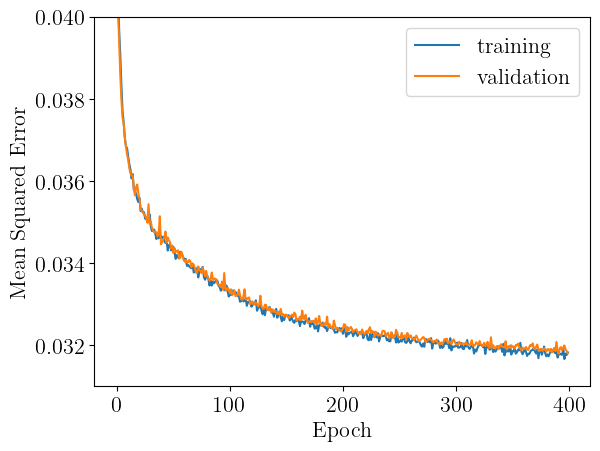

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


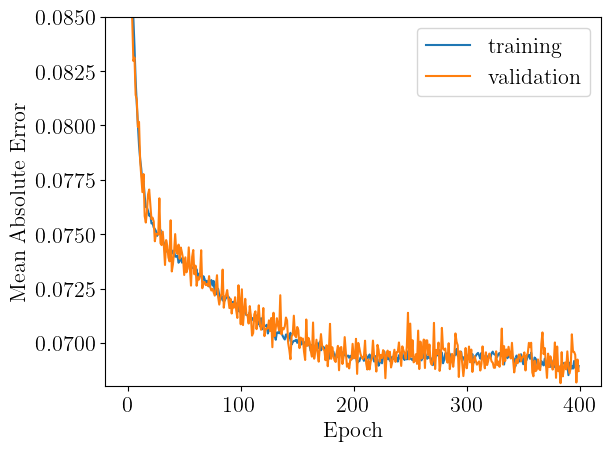

In [240]:
##
ax = plt.gca()
ax.set_ylim([0.031, 0.04])
plt.plot(x, bestreg['Value'], label='training')
plt.plot(x, bestregval['Value'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.savefig('bestreg.eps', format='eps', bbox_inches='tight')
plt.show()
##
ax = plt.gca()
ax.set_ylim([0.068, 0.085])
plt.plot(x, bestregmae['Value'], label='training')
plt.plot(x, bestregmaeval['Value'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.savefig('bestregmae.eps', format='eps', bbox_inches='tight')
plt.show()

## Evaluate best model

### Build scaffold

In [2]:
from tasks.v1.experiments.v1_0_x import CommandMetrics

inputs = keras.Input(shape=(127,), dtype=np.float32, name='input')
layer = keras.layers.Normalization()(inputs)

for hidden_size in [512,256,128]:
     layer = keras.layers.Dense(units=hidden_size, activation='relu')(layer)

classification_output = keras.layers.Dense(units=4, activation='softmax', name='class')(layer)
regression_output = keras.layers.Dense(6, activation='tanh', name='reg')(layer)

bestfitmodel = keras.Model(
    inputs=inputs, 
    outputs=[classification_output, regression_output], 
    name='bestfit'
)
bestfitmodel.compile(
    optimizer='adam',
    loss={
        'class': keras.losses.CategoricalCrossentropy(),
        'reg': keras.losses.MeanSquaredError()
    },
    metrics={
      'class': [
          keras.metrics.CategoricalAccuracy(name='acc'),
          CommandMetrics('dash'),
          CommandMetrics('turn'),
          CommandMetrics('kick'),
          CommandMetrics('tackle')
      ],
      'reg': [
          keras.metrics.RootMeanSquaredError(name='rmse'),
          keras.metrics.MeanAbsoluteError(name='mae'),
          keras.metrics.MeanAbsolutePercentageError(name='mape'),
      ]
    }
)

2021-11-15 16:50:47.757064: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load weights

In [3]:
bestfitmodel.load_weights(
    ## Place the model path here!
    './results/v1_0_1/bestfit/20211112-112248-train-v1.0.0-bestfit/session1/modelbestacc-input_arch_none-hidden_512_256_128-hidden_act_relu-lrate0001-adam-batch4096-epochs200-stepsperepoch300-valsteps200.hdf5'
)
bestfitmodel.summary()

Model: "bestfit"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 127)]        0                                            
__________________________________________________________________________________________________
normalization (Normalization)   (None, 127)          255         input[0][0]                      
__________________________________________________________________________________________________
dense (Dense)                   (None, 512)          65536       normalization[0][0]              
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          131328      dense[0][0]                      
____________________________________________________________________________________________

### Load test data

In [4]:
start = time.time()
from tasks.v1.experiments.v1_0_2 import (
    in_ablation_group,
    
)
from tasks.v1.experiments.v1_0_x import (
    ALL_BALL_FEATURES,
    ALL_PLAYER_FEATURES,
    ALL_SELF_FEATURES,
    OUTPUT_COLUMNS,
    HETEROPARAM_FEATURES
)
feature_columns_defaults = {
    **{feature_col: np.NaN for feature_col in ALL_BALL_FEATURES},
    **{feature_col: np.NaN for feature_col in filter(lambda feature: in_ablation_group(feature, 'none'), ALL_PLAYER_FEATURES)},
    **{feature_col: np.NaN for feature_col in ALL_SELF_FEATURES}
}
feature_columns = list(feature_columns_defaults.keys())
input_dimensions = len(feature_columns)
column_defaults = {
        **feature_columns_defaults,
        OUTPUT_COLUMNS[0]: str('nop'),    # Means "No Operation",
        **{regression_col: 0.0 for regression_col in OUTPUT_COLUMNS[1:]}
    }
selected_columns = list(column_defaults.keys())
print(f"Finished in {time.time()-start} sec")

Finished in 0.0031909942626953125 sec


In [5]:
start = time.time()
dataset = tf.data.experimental.make_csv_dataset(
    'indiv_arch_test_dataset.csv.gz',
    select_columns=selected_columns,
    column_defaults=column_defaults.values(),
    batch_size=4096,
    compression_type='GZIP',
    shuffle=False,
).skip(1515186//4096 + 1) # Skip validation 
print(f"Finished in {time.time()-start} sec")

Finished in 0.24130797386169434 sec


### Build data pipeline

In [6]:
start = time.time()
from tasks.v1.experiments.v1_0_2 import build_pipeline
dataset = build_pipeline(dataset, feature_columns)
print(f"Finished in {time.time()-start} sec")

Finished in 1.3797798156738281 sec


### Evaluate (may take a while)

In [7]:
start = time.time()
result = bestfitmodel.evaluate(
    dataset, 
    steps=1515186//4096,
    return_dict=True
)
print(f"Finished in {time.time()-start} sec")

2021-11-15 16:50:49.835805: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


369/369 [==============================] - 414s 555ms/step - loss: 0.3848 - class_loss: 0.3531 - reg_loss: 0.0318 - class_acc: 0.8455 - dash_acc: 0.6246 - dash_prec: 0.8577 - dash_rec: 0.9201 - dash_tp_cnt: 475694.1081 - dash_fp_cnt: 77341.9297 - dash_tn_cnt: 166777.6541 - dash_fn_cnt: 39983.2378 - turn_acc: 0.2085 - turn_prec: 0.8061 - turn_rec: 0.6641 - turn_tp_cnt: 159038.9973 - turn_fp_cnt: 37708.3270 - turn_tn_cnt: 483432.7649 - turn_fn_cnt: 79616.8405 - kick_acc: 0.0100 - kick_prec: 0.7746 - kick_rec: 0.0619 - kick_tp_cnt: 7674.1541 - kick_fp_cnt: 2225.1865 - kick_tn_cnt: 634797.6081 - kick_fn_cnt: 115099.9811 - tackle_acc: 8.3800e-05 - tackle_prec: nan - tackle_rec: 5.4095e-04 - tackle_tp_cnt: 64.5027 - tackle_fp_cnt: 49.7243 - tackle_tn_cnt: 642407.2595 - tackle_fn_cnt: 117275.4432 - reg_rmse: 0.1783 - reg_mae: 0.0687 - reg_mape: 24614932.0000
Finished in 413.9697849750519 sec


## Same but with extra dataset

In [29]:
start = time.time()
extradataset = tf.data.experimental.make_csv_dataset(
    'indiv_arch_extra_dataset.csv.gz',
    select_columns=selected_columns,
    column_defaults=column_defaults.values(),
    batch_size=4096,
    compression_type='GZIP',
    shuffle=False,
)
print(f"Finished in {time.time()-start} sec")

Finished in 0.20990705490112305 sec


In [30]:
start = time.time()
extradataset = build_pipeline(extradataset, feature_columns)
print(f"Finished in {time.time()-start} sec")

Finished in 0.31595611572265625 sec


In [31]:
start = time.time()
extraresult = bestfitmodel.evaluate(
    extradataset.cache(), 
    steps=607,
    return_dict=True
)
print(f"Finished in {time.time()-start} sec")

607/607 [==============================] - 349s 574ms/step - loss: 0.3938 - class_loss: 0.3618 - reg_loss: 0.0321 - class_acc: 0.8408 - dash_acc: 0.6288 - dash_prec: 0.8578 - dash_rec: 0.9168 - dash_tp_cnt: 785706.5411 - dash_fp_cnt: 128463.9885 - dash_tn_cnt: 263148.3207 - dash_fn_cnt: 69906.4128 - turn_acc: 0.2010 - turn_prec: 0.7895 - turn_rec: 0.6540 - turn_tp_cnt: 251151.5987 - turn_fp_cnt: 66475.2434 - turn_tn_cnt: 797703.2632 - turn_fn_cnt: 131895.1579 - kick_acc: 0.0095 - kick_prec: 0.7801 - kick_rec: 0.0571 - kick_tp_cnt: 11860.0674 - kick_fp_cnt: 3301.4145 - kick_tn_cnt: 1036994.7944 - kick_fn_cnt: 195068.9868 - tackle_acc: 1.1243e-04 - tackle_prec: nan - tackle_rec: 7.0588e-04 - tackle_tp_cnt: 136.6546 - tackle_fp_cnt: 129.7549 - tackle_tn_cnt: 1048718.2072 - tackle_fn_cnt: 198240.6464 - reg_rmse: 0.1791 - reg_mae: 0.0692 - reg_mape: 24875498.0000
Finished in 348.8400321006775 sec


2021-11-15 17:43:44.602258: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


## Compare!

In [34]:
pprint(result)
print()
pprint(extraresult)

{'class_acc': 0.8454735279083252,
 'class_loss': 0.3530600965023041,
 'dash_acc': 0.627380907535553,
 'dash_fn_cnt': 79450,
 'dash_fp_cnt': 154105,
 'dash_prec': 0.8616940975189209,
 'dash_rec': 0.9229512214660645,
 'dash_tn_cnt': 331300,
 'dash_tp_cnt': 946569,
 'kick_acc': 0.009967626072466373,
 'kick_fn_cnt': 229189,
 'kick_fp_cnt': 4366,
 'kick_prec': 0.7718011736869812,
 'kick_rec': 0.062280356884002686,
 'kick_tn_cnt': 1262705,
 'kick_tp_cnt': 15164,
 'loss': 0.38483768701553345,
 'reg_loss': 0.03177768364548683,
 'reg_mae': 0.06866299360990524,
 'reg_mape': 24614932.0,
 'reg_rmse': 0.17826291918754578,
 'tackle_acc': 0.00013732933439314365,
 'tackle_fn_cnt': 233444,
 'tackle_fp_cnt': 111,
 'tackle_prec': nan,
 'tackle_rec': 0.000866736110765487,
 'tackle_tn_cnt': 1277742,
 'tackle_tp_cnt': 127,
 'turn_acc': 0.2094011902809143,
 'turn_fn_cnt': 158582,
 'turn_fp_cnt': 74973,
 'turn_prec': 0.8095359802246094,
 'turn_rec': 0.6685234308242798,
 'turn_tn_cnt': 961860,
 'turn_tp_cnt': 

## Results

[0 2 4 6]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


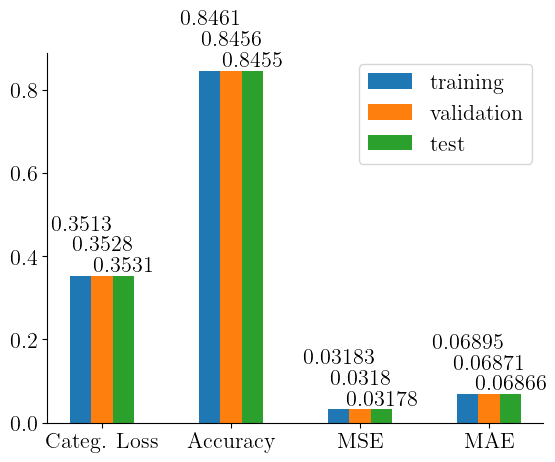

In [67]:
metrics = ['Categ. Loss', 'Accuracy', 'MSE', 'MAE']
train = [0.3513, 0.8461, 0.03183, 0.06895]
val = [0.3528, 0.8456, 0.0318, 0.06871]
test = [0.3531, 0.8455, 0.03178, 0.06866]

x = np.arange(0, 2*len(metrics), 2)  # the label locations
print(x)
width = 0.33  # the width of the bars

fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
train_rects = ax.bar(x - width, train, width, label='training')
val_rects = ax.bar(x, val, width, label='validation')
test_rects = ax.bar(x + width, test, width, label='test')

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

ax.bar_label(train_rects, padding=30)
ax.bar_label(val_rects, padding=15)
ax.bar_label(test_rects, padding=0)

plt.savefig('trainvaltestcmp.eps', format='eps', bbox_inches='tight')

In [68]:
for command in ['dash','turn','kick','tackle']:
    result[f'{command}_p_cnt'] = result[f'{command}_tp_cnt'] + result[f'{command}_fp_cnt']
    result[f'{command}_n_cnt'] = result[f'{command}_tn_cnt'] + result[f'{command}_fn_cnt']
    result[f'{command}_t_cnt'] = result[f'{command}_tn_cnt'] + result[f'{command}_tp_cnt']
    result[f'{command}_f_cnt'] = result[f'{command}_fn_cnt'] + result[f'{command}_fp_cnt']
    result[f'{command}_myacc'] = result[f'{command}_tp_cnt'] / (result[f'{command}_tp_cnt'] + result[f'{command}_fp_cnt'] + result[f'{command}_tn_cnt'] + result[f'{command}_fn_cnt'])
    result[f'{command}_myprec'] = result[f'{command}_tp_cnt'] / (result[f'{command}_tp_cnt'] + result[f'{command}_fp_cnt'])
    result[f'{command}_myrec'] = result[f'{command}_tp_cnt'] / (result[f'{command}_tp_cnt'] + result[f'{command}_fn_cnt'])
    result[f'{command}_mysen'] = result[f'{command}_tn_cnt'] / (result[f'{command}_tn_cnt'] + result[f'{command}_fp_cnt'])
result[f'command_issued_cnt'] = result[f'dash_p_cnt'] + result[f'turn_p_cnt'] + result[f'kick_p_cnt']+result[f'tackle_p_cnt']

pprint(result)

{'class_acc': 0.8454735279083252,
 'class_loss': 0.3530600965023041,
 'command_issued_cnt': 1511424,
 'dash_acc': 0.627380907535553,
 'dash_f_cnt': 233555,
 'dash_fn_cnt': 79450,
 'dash_fp_cnt': 154105,
 'dash_myacc': 0.6262762798526422,
 'dash_myprec': 0.8599903331958418,
 'dash_myrec': 0.9225647868119401,
 'dash_mysen': 0.682522841750703,
 'dash_n_cnt': 410750,
 'dash_p_cnt': 1100674,
 'dash_prec': 0.8616940975189209,
 'dash_rec': 0.9229512214660645,
 'dash_t_cnt': 1277869,
 'dash_tn_cnt': 331300,
 'dash_tp_cnt': 946569,
 'kick_acc': 0.009967626072466373,
 'kick_f_cnt': 233555,
 'kick_fn_cnt': 229189,
 'kick_fp_cnt': 4366,
 'kick_myacc': 0.010032922594850948,
 'kick_myprec': 0.7764464925755248,
 'kick_myrec': 0.06205776069866136,
 'kick_mysen': 0.9965542578119142,
 'kick_n_cnt': 1491894,
 'kick_p_cnt': 19530,
 'kick_prec': 0.7718011736869812,
 'kick_rec': 0.062280356884002686,
 'kick_t_cnt': 1277869,
 'kick_tn_cnt': 1262705,
 'kick_tp_cnt': 15164,
 'loss': 0.38483768701553345,
 'reg_

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


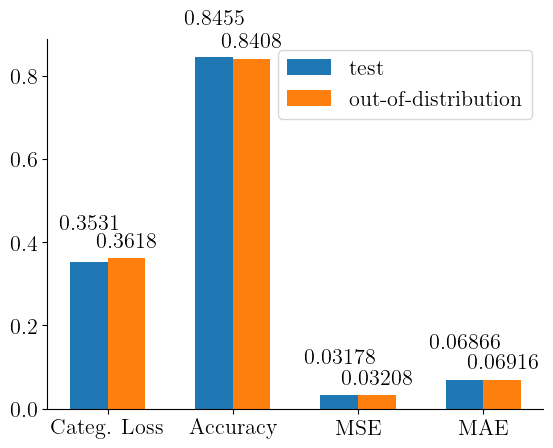

In [76]:
metrics = ['Categ. Loss', 'Accuracy', 'MSE', 'MAE']
ondist = [0.3531, 0.8455, 0.03178, 0.06866]
offdist = [0.3618, 0.8408, 0.03208, 0.06916]

x = np.arange(len(metrics))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ondist_rects = ax.bar(x - width/2, ondist, width, label='test')
offdist_rects = ax.bar(x + width/2, offdist, width, label='out-of-distribution')


# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

ax.bar_label(ondist_rects, padding=20)
ax.bar_label(offdist_rects, padding=5)

plt.savefig('outofdistcmp.eps', format='eps', bbox_inches='tight')